<a href="https://colab.research.google.com/github/Jamunajayanna/DataScience/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
thislist = ["apple", "banana", "cherry", "orange", "kiwi", "melon", "mango"]
print(thislist[3:6])
print(thislist[:4])
print(thislist[2:])
print(thislist[-4:-1])
print(thislist[-1:-4])
# print(thislist[])

['orange', 'kiwi', 'melon']
['apple', 'banana', 'cherry', 'orange']
['cherry', 'orange', 'kiwi', 'melon', 'mango']
['orange', 'kiwi', 'melon']
[]
[]


In [ ]:
import numpy as np
array1=np.array([1,2,3,4,5,67,7,8,9,29])
print(np.shape(array1))
print(array1.shape)
print(np.ndim(array1))
print(np.size(array1))
print(array1.dtype)
print(array1.flatten)
array2=np.zeros((2,3))
print(array2)
array3=np.ones((3,3))
print(array3)
array3=np.empty((3,3))
print(array3)


(10,)
(10,)
1
10
int64
<built-in method flatten of numpy.ndarray object at 0x7f85f42b9530>
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
# arr = np.ones((2, 3))
# print(arr)
# # Output:
# # [[1. 1. 1.]
# #  [1. 1. 1.]]
# arr = np.empty((2, 3))
# print(arr)


# array3=np.arange(1,10,2)
# print(array3)

# array4=np.identity(3)
# print(array4)

array5=np.array([[1,2,34,3],[1,23,4,5]])
print(array5)
print(np.transpose(array5))

[[ 1  2 34  3]
 [ 1 23  4  5]]
[[ 1  1]
 [ 2 23]
 [34  4]
 [ 3  5]]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import kagglehub
import pandas as pd
import os

# Download the latest version of the dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

# Check if the path is a directory and find the CSV file
if os.path.isdir(path):
    for filename in os.listdir(path):
        if filename.endswith(".csv"):
            filepath = os.path.join(path, filename)
            df = pd.read_csv(filepath)
            break  # Stop after reading the first CSV file
    else:
        print("No CSV file found in the downloaded directory.")
else:
    # If path is not a directory, assume it's a file and try to read it
    df = pd.read_csv(path)

# Display the first few rows of the dataset
df.head()


100%|██████████| 48.6k/48.6k [00:00<00:00, 15.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [7]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:
for columns in df.select_dtypes(include=np.number).columns:
  df[columns].fillna(df[columns].mean(),inplace=True)

<ipython-input-9-b7551bf2056c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columns].fillna(df[columns].mean(),inplace=True)


In [10]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [11]:
for columns in df.select_dtypes(include=['object']).columns:
  df[columns].fillna(df[columns].mode(),inplace=True)

<ipython-input-11-7864a410e324>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columns].fillna(df[columns].mode(),inplace=True)


In [12]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
df['radius_mean'] = df['radius_mean'].fillna(df['radius_mean'].mean())
df['texture_mean'] = df['texture_mean'].fillna(df['texture_mean'].mean())
df['perimeter_mean'] = df['perimeter_mean'].fillna(df['perimeter_mean'].mean())
df['area_mean'] = df['area_mean'].fillna(df['area_mean'].mean())
df['smoothness_mean'] = df['smoothness_mean'].fillna(df['smoothness_mean'].mean())
df['compactness_mean'] = df['compactness_mean'].fillna(df['compactness_mean'].mean())
df['concavity_mean'] = df['concavity_mean'].fillna(df['concavity_mean'].mean())
df['concave points_mean'] = df['concave points_mean'].fillna(df['concave points_mean'].mean())
df['symmetry_mean'] = df['symmetry_mean'].fillna(df['symmetry_mean'].mean())
df['fractal_dimension_mean'] = df['fractal_dimension_mean'].fillna(df['fractal_dimension_mean'].mean())
df['radius_se'] = df['radius_se'].fillna(df['radius_se'].mean())
df['texture_se'] = df['texture_se'].fillna(df['texture_se'].mean())

In [14]:
df.shape

(569, 33)

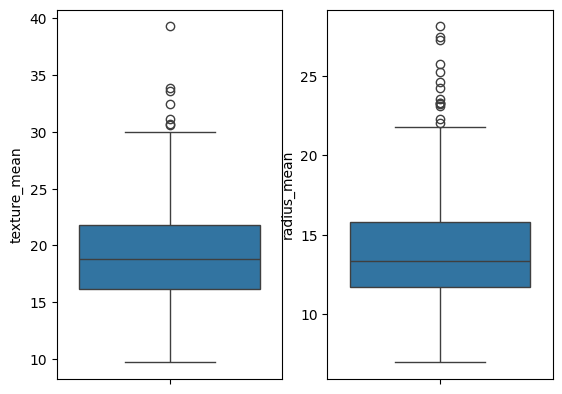

In [18]:
plt.figure()
plt.subplot(1,2,1)
sns.boxplot(df['texture_mean'])

plt.subplot(1,2,2)
sns.boxplot(df['radius_mean'])
plt.show()

[]

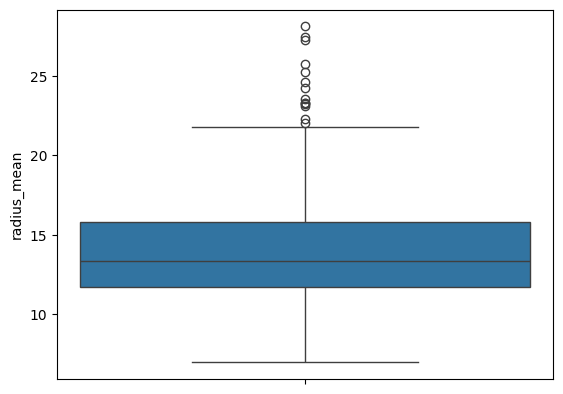

In [17]:

sns.boxplot(df['radius_mean'])
plt.plot()

In [19]:
Q1_text=df['texture_mean'].quantile(0.25)
Q3_text=df['texture_mean'].quantile(0.75)

IQR=Q3_text-Q1_text

lower_text=Q1_text-1.5*IQR
upper_text=Q3_text+1.5*IQR


Q1_radius=df['radius_mean'].quantile(0.25)
Q3_radius=df['radius_mean'].quantile(0.75)

IQR_radius=Q3_radius-Q1_radius

lower_radius=Q1_radius-1.5*IQR_radius
upper_radius=Q3_radius+1.5*IQR_radius

df_clean=df[ (df['texture_mean']>=lower_text) &(df['texture_mean']<=upper_text) & (df['radius_mean']>=lower_radius) &(df['radius_mean']<=upper_radius)]
print(df_clean.shape)

(548, 33)


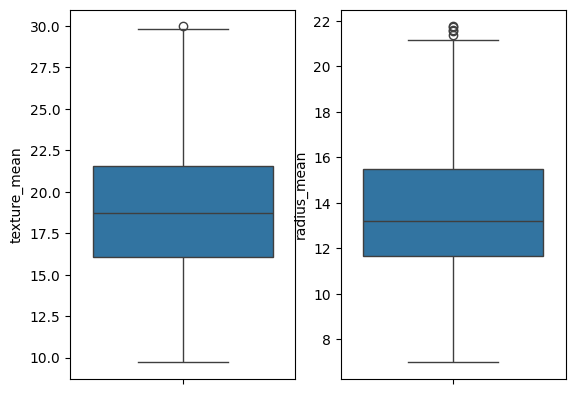

In [20]:
plt.figure()
plt.subplot(1,2,1)
sns.boxplot(df_clean['texture_mean'])

plt.subplot(1,2,2)
sns.boxplot(df_clean['radius_mean'])
plt.show()

In [27]:
# y=df['diagnosis']
# X=df[['texture_mean','radius_mean']]

In [28]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
y=label1.fit_transform(y)

In [29]:
from sklearn.preprocessing import StandardScaler
label2=StandardScaler()
X=label2.fit_transform(X)

In [31]:
X.size

1138

In [32]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_value=list(range(1,30))
accuracies=[]
for k in k_value:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  prediction=knn.predict(X_test)
  accuracy=accuracy_score(y_test,prediction)
  accuracies.append(accuracy)

for k, accuracy in zip(k_value, accuracies):
    print(f'k={k}, Accuracy: {accuracy:.4f}')
best_k = k_value[accuracies.index(max(accuracies))]
print(f'Best k: {best_k} with accuracy: {max(accuracies):.4f}')



k=1, Accuracy: 0.8947
k=2, Accuracy: 0.8947
k=3, Accuracy: 0.8947
k=4, Accuracy: 0.8860
k=5, Accuracy: 0.9035
k=6, Accuracy: 0.9035
k=7, Accuracy: 0.9035
k=8, Accuracy: 0.9211
k=9, Accuracy: 0.9211
k=10, Accuracy: 0.9298
k=11, Accuracy: 0.9035
k=12, Accuracy: 0.9298
k=13, Accuracy: 0.9211
k=14, Accuracy: 0.9298
k=15, Accuracy: 0.9211
k=16, Accuracy: 0.9211
k=17, Accuracy: 0.9211
k=18, Accuracy: 0.9211
k=19, Accuracy: 0.9123
k=20, Accuracy: 0.9211
k=21, Accuracy: 0.9035
k=22, Accuracy: 0.9123
k=23, Accuracy: 0.9035
k=24, Accuracy: 0.9123
k=25, Accuracy: 0.9035
k=26, Accuracy: 0.9035
k=27, Accuracy: 0.9123
k=28, Accuracy: 0.9123
k=29, Accuracy: 0.9123
Best k: 10 with accuracy: 0.9298


In [43]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score
best_k=10
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
accuracy=accuracy_score(y_test,prediction)
print(accuracy)

confusion_matrix=confusion_matrix(y_test,prediction)
print(confusion_matrix)

recall=recall_score(y_test,prediction)
print(recall)

pre=precision_score(y_test,prediction)
print(pre)

f1=f1_score(y_test,prediction)
print(f1)


0.9298245614035088
[[68  3]
 [ 5 38]]
0.8837209302325582
0.926829268292683
0.9047619047619048


<Axes: >

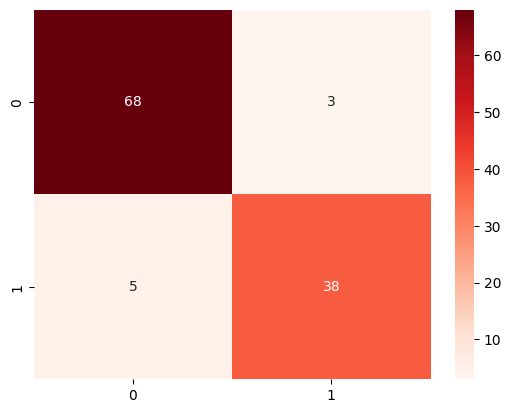

In [44]:
sns.heatmap(confusion_matrix,annot=True,fmt='g',cmap='Reds')


<Axes: >

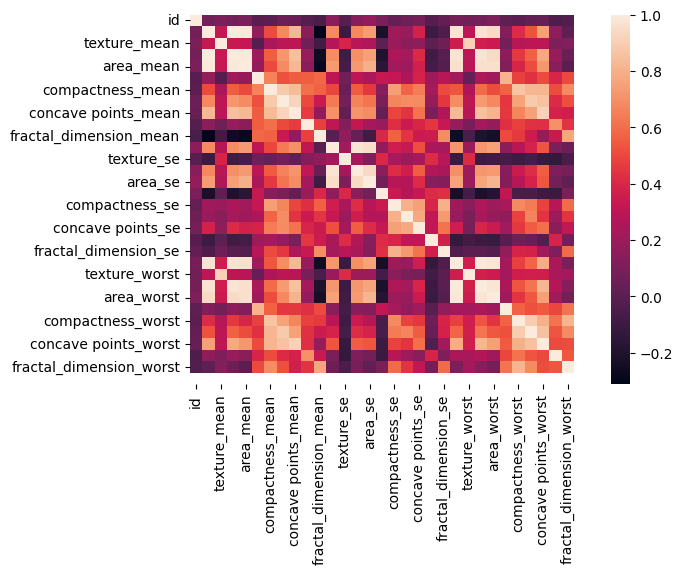

In [45]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr())